 ## Pre-processing and Training Data Development

- Goal is to create a cleaned development dataset you can use to complete the modeling step of this project. 

In [1]:
# Import libraries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import os
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\gosal\Anaconda3_2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
os.getcwd()

'C:\\Shalin\\Springboard bootcamp\\projects\\Capstone project 2\\Capstone Two'

In [3]:
df = pd.read_csv("data/Quora_cleaned.csv")

In [4]:
df.shape

(1024881, 6)

In [5]:
df.head(5)

,Unnamed: 0,qid,question_stemmed,target,question_length,total_words
0,460851,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,212,32
1,158221,1ef37766a923f24f2182,didnt genghi khan thee great khan abolish dest...,1,209,32
2,393959,4d2e2796dd1ced2c8e64,prospect intern student httpwwwophammainquorac...,0,209,12
3,753959,93b9389889ad4aa8518a,waz genghiz khanz thee great khanz go get libe...,1,207,32
4,251508,313a5512fefd7dbf0fba,safe north east indian assam arunach pradesh m...,0,204,27


In [6]:
df['question_stemmed']= df['question_stemmed'].str.replace('”', '')
df['question_stemmed']= df['question_stemmed'].str.replace('“', '')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024881 entries, 0 to 1024880
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Unnamed: 0        1024881 non-null  int64 
 1   qid               1024881 non-null  object
 2   question_stemmed  1024881 non-null  object
 3   target            1024881 non-null  int64 
 4   question_length   1024881 non-null  int64 
 5   total_words       1024881 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 46.9+ MB


In [8]:
# Drop index columns
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(10)

,qid,question_stemmed,target,question_length,total_words
0,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,212,32
1,1ef37766a923f24f2182,didnt genghi khan thee great khan abolish dest...,1,209,32
2,4d2e2796dd1ced2c8e64,prospect intern student httpwwwophammainquorac...,0,209,12
3,93b9389889ad4aa8518a,waz genghiz khanz thee great khanz go get libe...,1,207,32
4,313a5512fefd7dbf0fba,safe north east indian assam arunach pradesh m...,0,204,27
5,1d49a0610c8be715e275,much public school teacher salari benefit sout...,0,200,26
6,8727cf4973780583dd19,would arrang follow term act skill alia bhatt ...,0,199,28
7,4a24f6189a1c20915f68,qué carrera estudiar para ser un científico co...,0,197,34
8,2d686cc72efb2b7b5435,relat sport take ibuprofen aspirin acetaminoph...,0,194,28
9,6700a979fa215d451fc3,listen everyon next 911 major nuclear attack h...,1,194,34


In [9]:
# Rename question_stemmed column
df = df.rename(columns = {"question_stemmed":"question_final"})
df.head()

,qid,question_final,target,question_length,total_words
0,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,212,32
1,1ef37766a923f24f2182,didnt genghi khan thee great khan abolish dest...,1,209,32
2,4d2e2796dd1ced2c8e64,prospect intern student httpwwwophammainquorac...,0,209,12
3,93b9389889ad4aa8518a,waz genghiz khanz thee great khanz go get libe...,1,207,32
4,313a5512fefd7dbf0fba,safe north east indian assam arunach pradesh m...,0,204,27


In [10]:
# Print the data type of each column
print(df.dtypes)

qid                object
question_final     object
target              int64
question_length     int64
total_words         int64
dtype: object


### Standardize the magnitude of numeric features using a scaler

In [11]:
# Find the average length of word
df['avg_word_length'] = df['question_length'] / df['total_words']

# Print the first 5 rows of these columns
print(df[['question_final', 'question_length', 'total_words', 'avg_word_length']].head(5))

                                      question_final  question_length  \
0  didnt genghiz khan thee great khan abolish des...              212   
1  didnt genghi khan thee great khan abolish dest...              209   
2  prospect intern student httpwwwophammainquorac...              209   
3  waz genghiz khanz thee great khanz go get libe...              207   
4  safe north east indian assam arunach pradesh m...              204   

   total_words  avg_word_length  
0           32         6.625000  
1           32         6.531250  
2           12        17.416667  
3           32         6.468750  
4           27         7.555556  


In [12]:
# Create subset of only the numeric columns
numeric_df = df.select_dtypes(include=['int64','float'])
print(numeric_df.columns)

Index(['target', 'question_length', 'total_words', 'avg_word_length'], dtype='object')


In [13]:
# Create subset of only the categorical variable columns
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.columns)

Index(['qid', 'question_final'], dtype='object')


In [14]:
numeric_df['avg_word_length'].describe()

count    1.024881e+06
mean     6.039560e+00
std      9.063825e-01
min      1.933333e+00
25%      5.444444e+00
50%      6.000000e+00
75%      6.571429e+00
max      5.300000e+01
Name: avg_word_length, dtype: float64

In [15]:
# Instantiate StandardScaler to generate the absolute values are mapped in the range [0, 1].
# This is optional step for our dataset since there are not many outliers, however, this condenses data even better

scaler = MaxAbsScaler()

# Fit SS_scaler to the data
scaler.fit(numeric_df[['avg_word_length']])

# Transform the data using the fitted scaler
numeric_df['avg_word_length_scaled'] = scaler.transform(numeric_df[['avg_word_length']])

# Compare the origional and transformed column
print(numeric_df[['avg_word_length_scaled', 'avg_word_length']].head(5))

   avg_word_length_scaled  avg_word_length
0                0.125000         6.625000
1                0.123231         6.531250
2                0.328616        17.416667
3                0.122052         6.468750
4                0.142558         7.555556


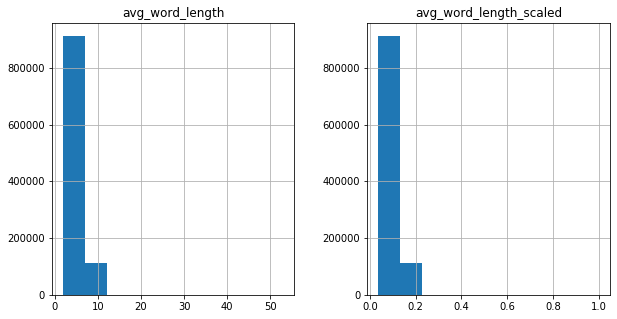

In [16]:
# Create a histogram for the 2 
plt.rcParams["figure.figsize"] = (10,5)

numeric_df.hist(['avg_word_length','avg_word_length_scaled'])
plt.show()

In [17]:
# Drop non scaled column
numeric_df.drop(columns='avg_word_length', inplace=True)
numeric_df.head(5)

,target,question_length,total_words,avg_word_length_scaled
0,1,212,32,0.125000
1,1,209,32,0.123231
2,0,209,12,0.328616
3,1,207,32,0.122052
4,0,204,27,0.142558


In [18]:
numeric_df['avg_word_length_scaled'].describe()

count    1.024881e+06
mean     1.139540e-01
std      1.710156e-02
min      3.647799e-02
25%      1.027254e-01
50%      1.132075e-01
75%      1.239892e-01
max      1.000000e+00
Name: avg_word_length_scaled, dtype: float64

In [19]:
df_numeric_scaled = pd.concat([categorical_df, numeric_df], axis=1, sort=False)
df_numeric_scaled.head(5)

,qid,question_final,target,question_length,total_words,avg_word_length_scaled
0,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,212,32,0.125000
1,1ef37766a923f24f2182,didnt genghi khan thee great khan abolish dest...,1,209,32,0.123231
2,4d2e2796dd1ced2c8e64,prospect intern student httpwwwophammainquorac...,0,209,12,0.328616
3,93b9389889ad4aa8518a,waz genghiz khanz thee great khanz go get libe...,1,207,32,0.122052
4,313a5512fefd7dbf0fba,safe north east indian assam arunach pradesh m...,0,204,27,0.142558


In [20]:
df_numeric_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024881 entries, 0 to 1024880
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   qid                     1024881 non-null  object 
 1   question_final          1024881 non-null  object 
 2   target                  1024881 non-null  int64  
 3   question_length         1024881 non-null  int64  
 4   total_words             1024881 non-null  int64  
 5   avg_word_length_scaled  1024881 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 46.9+ MB


### Perform Count vectorization (OR TFIDF) on categorical feature to fit and transform data

In [21]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#'quantum' in ENGLISH_STOP_WORDS 
#'scammers' in ENGLISH_STOP_WORDS 
'ask stupid question' in ENGLISH_STOP_WORDS 

False

In [30]:
# Import CountVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
#from nltk.tokenize import TreebankWordTokenizer
#import re

# Instantiate a trigram vectorizer
# In data Wrangling step, stop words were removed using nltk. However at this step, we will remove stop_words using sklearn library too
#cv_bigram_vec = CountVectorizer(stop_words='english',
#                                 max_features=500, 
#                                 tokenizer=TreebankWordTokenizer().tokenize,
#                                 ngram_range=(1,1))

# Fit and apply trigram vectorizer
#cv_bigram = cv_bigram_vec.fit_transform(df_numeric_scaled['question_final'])

# Print the trigram features
#print(cv_bigram_vec.get_feature_names())

# Create a DataFrame of the features
#cv_bi_df = pd.DataFrame(cv_bigram.toarray(), 
#                 columns=cv_bigram_vec.get_feature_names())

In [31]:
#print(cv_bi_df.sum().sort_values(ascending=False).head(5))

In [22]:
#TFIDF representation (ignoring common words)

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=200, ngram_range=(1, 1), stop_words = 'english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(df['question_final'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names())
print(tv_df.head())

    10  2017  2018  account  act  actual  affect  allow  alway  america  ...  \
0  0.0   0.0   0.0      0.0  0.0     0.0     0.0    0.0    0.0      0.0  ...   
1  0.0   0.0   0.0      0.0  0.0     0.0     0.0    0.0    0.0      0.0  ...   
2  0.0   0.0   0.0      0.0  0.0     0.0     0.0    0.0    0.0      0.0  ...   
3  0.0   0.0   0.0      0.0  0.0     0.0     0.0    0.0    0.0      0.0  ...   
4  0.0   0.0   0.0      0.0  0.0     0.0     0.0    0.0    0.0      0.0  ...   

   water  way  websit  white  women  word  work     world  write  year  
0    0.0  0.0     0.0    0.0    0.0   0.0   0.0  0.488119    0.0   0.0  
1    0.0  0.0     0.0    0.0    0.0   0.0   0.0  0.525668    0.0   0.0  
2    0.0  0.0     0.0    0.0    0.0   0.0   0.0  0.000000    0.0   0.0  
3    0.0  0.0     0.0    0.0    0.0   0.0   0.0  0.539503    0.0   0.0  
4    0.0  0.0     0.0    0.0    0.0   0.0   0.0  0.000000    0.0   0.0  

[5 rows x 200 columns]


In [23]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head(5))

everi     0.574746
world     0.488119
person    0.463753
free      0.289348
black     0.280321
Name: 0, dtype: float64


In [24]:
df_final_tfidf = pd.concat([df_numeric_scaled, tv_df], axis=1, sort=False)
df_final_tfidf.head(5)

,qid,question_final,target,question_length,total_words,avg_word_length_scaled,10,2017,2018,account,...,water,way,websit,white,women,word,work,world,write,year
0,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,212,32,0.125000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488119,0.0,0.0
1,1ef37766a923f24f2182,didnt genghi khan thee great khan abolish dest...,1,209,32,0.123231,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.525668,0.0,0.0
2,4d2e2796dd1ced2c8e64,prospect intern student httpwwwophammainquorac...,0,209,12,0.328616,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,93b9389889ad4aa8518a,waz genghiz khanz thee great khanz go get libe...,1,207,32,0.122052,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.539503,0.0,0.0
4,313a5512fefd7dbf0fba,safe north east indian assam arunach pradesh m...,0,204,27,0.142558,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [32]:
#df_final = pd.concat([df_numeric_scaled, cv_bi_df], axis=1, sort=False)
#df_final.head(5)

### Split into testing and training datasets 

In [33]:
#from sklearn.model_selection import train_test_split

#train_df, test_df = train_test_split(df_final, test_size=0.3)

In [25]:
from sklearn.model_selection import train_test_split

train_df_tfidf, test_df_tfidf = train_test_split(df_final_tfidf, test_size=0.3)

In [26]:
train_df_tfidf.shape

(717416, 206)

In [27]:
test_df_tfidf.shape

(307465, 206)

In [25]:
#train_df.shape

(717416, 506)

In [26]:
#test_df.shape

(307465, 506)

In [34]:
#test_df.head(5)

In [28]:
#test_df.to_csv("data/FeatureEngineering_Test.csv")

In [29]:
#train_df.to_csv("data/FeatureEngineering_Train.csv")

In [28]:
test_df_tfidf.to_csv("data/FeatureEngineering_tfidf_Test.csv")

In [29]:
train_df_tfidf.to_csv("data/FeatureEngineering_tfidf_Train.csv")